<a href="https://colab.research.google.com/github/GandhamCharanSai/FML/blob/main/Univarient_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
data=pd.read_csv('/content/Company_data.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [5]:
X=data['TV'].values
Y=data['Sales'].values

In [6]:
type(X),type(Y)

(numpy.ndarray, numpy.ndarray)

In [7]:
X.shape,Y.shape

((200,), (200,))

In [8]:
X=X.reshape(-1,1)
Y=Y.reshape(-1,1)

In [9]:
X.shape,Y.shape

((200, 1), (200, 1))

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.20,random_state=0)

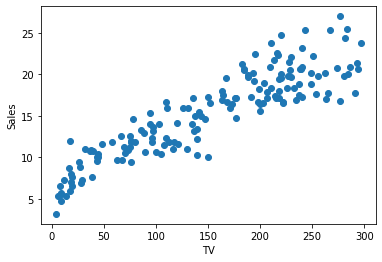

In [11]:
plt.scatter(x_train,y_train)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [12]:
reg=linear_model.Lasso(alpha=0.7)
reg.fit(x_train,y_train)

Lasso(alpha=0.7)

In [13]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
y_pred_train=reg.predict(x_train)
print(f'MAE={mean_absolute_error(y_train,y_pred_train)}')
print(f'MSE={mean_squared_error(y_train,y_pred_train)}')
print(f'RMSE={np.sqrt(mean_squared_error(y_train,y_pred_train))}')
print(f'R2={r2_score(y_train,y_pred_train)}')


MAE=1.7877466939518538
MSE=4.873824028041018
RMSE=2.207673895311764
R2=0.8134561974048485


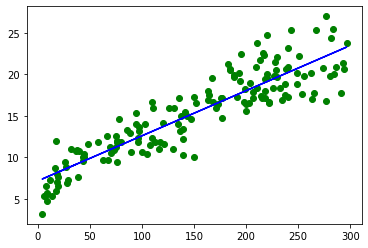

In [14]:
plt.scatter(x_train,y_train,color='g')
plt.plot(x_train,reg.predict(x_train),color='b')
plt.show()

In [15]:
y_pred_test=reg.predict(x_test)
print(f'MAE={mean_absolute_error(y_test,y_pred_test)}')
print(f'MSE={mean_squared_error(y_test,y_pred_test)}')
print(f'RMSE={np.sqrt(mean_squared_error(y_test,y_pred_test))}')
print(f'R2={r2_score(y_test,y_pred_test)}')

MAE=2.0172132283671482
MSE=6.646665332081237
RMSE=2.5781127461926947
R2=0.8008674750186129


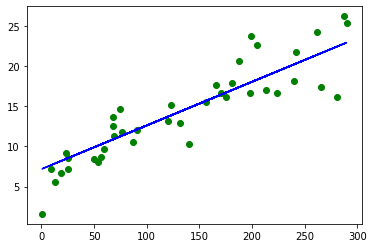

In [16]:
plt.scatter(x_test,y_test,color='g')
plt.plot(x_test,reg.predict(x_test),color='b')
plt.show()